<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [237]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Definición del Problema
- **Contexto:** Los datos corresponden a propiedades en California del censo de 1990
- **Objetivo:** El objetivo es predecir el valor medio de las viviendas(median_house_value) mediante un modelo de ML.

In [238]:
caracteristicas = [
    ("MedInc", "Ingreso medio de los hogares"),
    ("HouseAge", "Edad media de las viviendas"), 
    ("AveRooms", "Promedio de habitaciones por vivienda"),
    ("AveBedrms", "Promedio de dormitorios por vivienda"),
    ("Population", "Población en el área"),
    ("AveOccup", "Promedio de ocupantes por vivienda"),
    ("Latitude", "Latitud geográfica"),
    ("Longitude", "Longitud geográfica")
]

print("\n   Características Predictoras:")


for i, (feature, desc) in enumerate(caracteristicas, 1):
    print(f"   {i}. {feature:12} - {desc}")

print("\nINFORMACIÓN DEL DATASET:")
print(f"   - Número total de registros: {housing.shape[0]:,}")
print(f"   - Número de características: {housing.shape[1] - 1}")
print(f"   - Período de los datos: 1990")
print(f"   - Ubicación: California, USA")

print("\nENFOQUE METODOLÓGICO:")
print("   - Comparación de múltiples algoritmos de regresión")
print("   - Validación cruzada para robustez del modelo")
print("   - Análisis de importancia de características")
print("   - Evaluación con métricas estándar de regresión")

print("\n" + "="*60)


   Características Predictoras:
   1. MedInc       - Ingreso medio de los hogares
   2. HouseAge     - Edad media de las viviendas
   3. AveRooms     - Promedio de habitaciones por vivienda
   4. AveBedrms    - Promedio de dormitorios por vivienda
   5. Population   - Población en el área
   6. AveOccup     - Promedio de ocupantes por vivienda
   7. Latitude     - Latitud geográfica
   8. Longitude    - Longitud geográfica

INFORMACIÓN DEL DATASET:
   - Número total de registros: 20,640
   - Número de características: 8
   - Período de los datos: 1990
   - Ubicación: California, USA

ENFOQUE METODOLÓGICO:
   - Comparación de múltiples algoritmos de regresión
   - Validación cruzada para robustez del modelo
   - Análisis de importancia de características
   - Evaluación con métricas estándar de regresión



## Estadística Descriptiva

In [239]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Visualización descriptiva


 CORRELACIONES CON EL VALOR DE VIVIENDA:
   MedInc         :  0.688 Ojo aquí
   AveRooms       :  0.152 Bajo
   HouseAge       :  0.106 Bajo
   AveOccup       : -0.024 Bajo
   Population     : -0.025 Bajo
   Longitude      : -0.046 Bajo
   AveBedrms      : -0.047 Bajo
   Latitude       : -0.144 Bajo

 ESTADÍSTICAS DEL TARGET:
   Media: 2.07
   Mediana: 1.80
   Desviación estándar: 1.15
   Rango: [0.15, 5.00]

 VARIABLES CON CORRELACIÓN > 0.3: MedInc



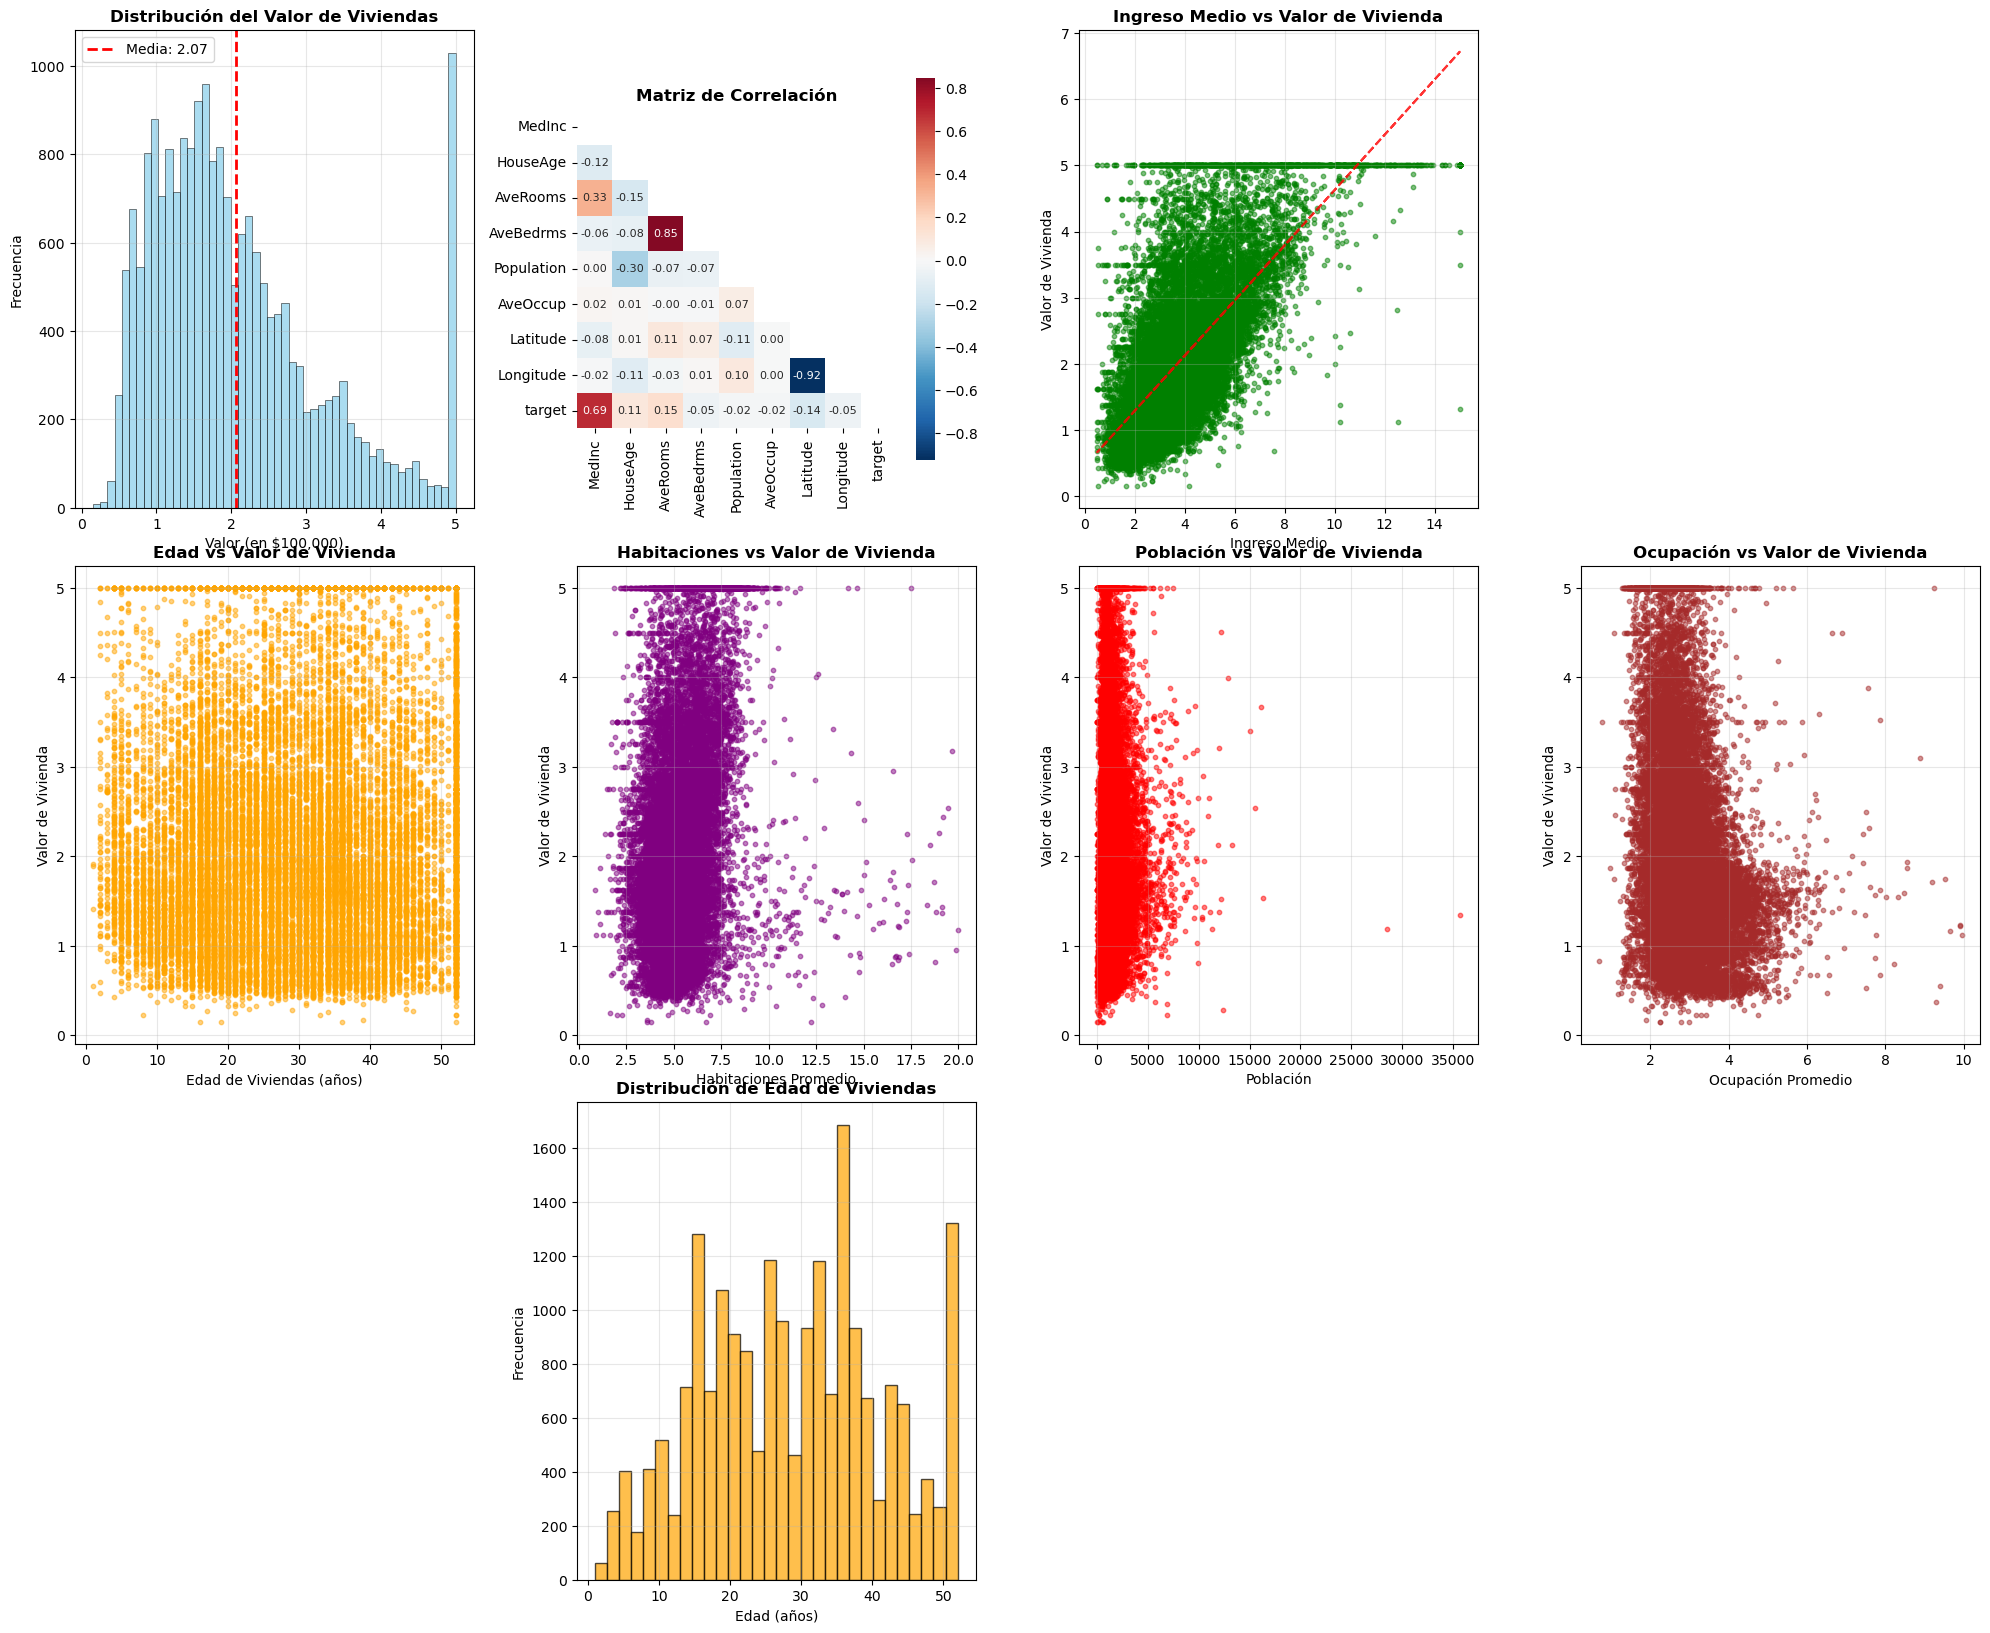

In [240]:
# Configuración de estilo para los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Crear una figura con múltiples subplots
fig = plt.figure(figsize=(20, 16))

# =============================================================================
# GRÁFICO 1: Distribución de la variable objetivo
# =============================================================================
plt.subplot(3, 4, 1)
plt.hist(housing['target'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5)
plt.title('Distribución del Valor de Viviendas', fontsize=12, fontweight='bold')
plt.xlabel('Valor (en $100,000)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.axvline(housing['target'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {housing["target"].mean():.2f}')
plt.legend()

# =============================================================================
# GRÁFICO 2: Matriz de correlación
# =============================================================================
plt.subplot(3, 4, 2)
correlation_matrix = housing.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, 
            annot_kws={'size': 8})
plt.title('Matriz de Correlación', fontsize=12, fontweight='bold')
plt.tight_layout()

# =============================================================================
# GRÁFICO 3: Ingreso medio vs Valor de vivienda
# =============================================================================
plt.subplot(3, 4, 3)
plt.scatter(housing['MedInc'], housing['target'], alpha=0.5, s=10, color='green')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor de Vivienda')
plt.title('Ingreso Medio vs Valor de Vivienda', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(housing['MedInc'], housing['target'], 1)
p = np.poly1d(z)
plt.plot(housing['MedInc'], p(housing['MedInc']), "r--", alpha=0.8)

# =============================================================================
# GRÁFICO 4: Edad de viviendas vs Valor
# =============================================================================
plt.subplot(3, 4, 5)
plt.scatter(housing['HouseAge'], housing['target'], alpha=0.5, s=10, color='orange')
plt.xlabel('Edad de Viviendas (años)')
plt.ylabel('Valor de Vivienda')
plt.title('Edad vs Valor de Vivienda', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# =============================================================================
# GRÁFICO 5: Habitaciones promedio vs Valor
# =============================================================================
plt.subplot(3, 4, 6)
# Limitar el rango para mejor visualización (eliminar outliers)
rooms_filtered = housing[housing['AveRooms'] < 20]
plt.scatter(rooms_filtered['AveRooms'], rooms_filtered['target'], alpha=0.5, s=10, color='purple')
plt.xlabel('Habitaciones Promedio')
plt.ylabel('Valor de Vivienda')
plt.title('Habitaciones vs Valor de Vivienda', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# =============================================================================
# GRÁFICO 6: Población vs Valor
# =============================================================================
plt.subplot(3, 4, 7)
plt.scatter(housing['Population'], housing['target'], alpha=0.5, s=10, color='red')
plt.xlabel('Población')
plt.ylabel('Valor de Vivienda')
plt.title('Población vs Valor de Vivienda', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# =============================================================================
# GRÁFICO 7: Ocupación vs Valor
# =============================================================================
plt.subplot(3, 4, 8)
# Limitar el rango para mejor visualización
occup_filtered = housing[housing['AveOccup'] < 10]
plt.scatter(occup_filtered['AveOccup'], occup_filtered['target'], alpha=0.5, s=10, color='brown')
plt.xlabel('Ocupación Promedio')
plt.ylabel('Valor de Vivienda')
plt.title('Ocupación vs Valor de Vivienda', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)


# =============================================================================
# GRÁFICO 8: Distribución de edades de viviendas
# =============================================================================
plt.subplot(3, 4, 10)
plt.hist(housing['HouseAge'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad de Viviendas', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)



# =============================================================================
# ANÁLISIS DE LOS GRÁFICOS
# =============================================================================

# Correlaciones más importantes con el target
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("\n CORRELACIONES CON EL VALOR DE VIVIENDA:")
for feature, corr in target_correlations.items():
    if feature != 'target':
        print(f"   {feature:15}: {corr:6.3f} {'Bajo' if abs(corr) < 0.3 else 'Media' if abs(corr) < 0.6 else 'Ojo aquí'}")


# Estadísticas descriptivas adicionales
print(f"\n ESTADÍSTICAS DEL TARGET:")
print(f"   Media: {housing['target'].mean():.2f}")
print(f"   Mediana: {housing['target'].median():.2f}")
print(f"   Desviación estándar: {housing['target'].std():.2f}")
print(f"   Rango: [{housing['target'].min():.2f}, {housing['target'].max():.2f}]")

# Identificar variables con alta correlación
high_corr_features = target_correlations[abs(target_correlations) > 0.3].index.tolist()
high_corr_features.remove('target')  # Remover el target mismo
print(f"\n VARIABLES CON CORRELACIÓN > 0.3: {', '.join(high_corr_features)}")

print("\n" + "="*60)

## Preprocesamiento

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Verificar valores nulos
print("\n📊 VALORES NULOS:")
print(housing.isnull().sum())

# Separar características y variable objetivo
X = housing.drop('target', axis=1)
y = housing['target']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Escalar las características porque tienen diferentes unidades y escalas.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para mejor manejo
feature_names = X.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)




📊 VALORES NULOS:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


## Selección del Modelo

In [242]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Encontrar el mejor k para K-Neighbors
k_range = list(range(1, 21))
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid={'n_neighbors': k_range}, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
best_k = grid.best_params_['n_neighbors']

# Ahora definimos los modelos incluyendo el de K-Neighbors con el mejor k
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Neighbors Regression": KNeighborsRegressor(n_neighbors=best_k)
}

results = {}

print("Model Evaluation Results")
print("=" * 50)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    model.fit(X_train_scaled, y_train)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    train_metrics = regression_metrics(pd.DataFrame({'y': y_train, 'yhat': y_pred_train}))
    test_metrics = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_test}))
    
    results[name] = {
        "model": model,
        "cv_rmse": cv_rmse,
        "train_rmse": train_metrics['rmse'].iloc[0],
        "test_rmse": test_metrics['rmse'].iloc[0],
        "test_mae": test_metrics['mae'].iloc[0],
        "test_mape": test_metrics['mape'].iloc[0]
    }
    
    print(f"{name}:")
    print(f"  CV RMSE: {cv_rmse:.4f}")
    print(f"  Train RMSE: {train_metrics['rmse'].iloc[0]:.4f}")
    print(f"  Test RMSE: {test_metrics['rmse'].iloc[0]:.4f}")
    print(f"  Test MAE: {test_metrics['mae'].iloc[0]:.4f}")
    print(f"  Test MAPE: {test_metrics['mape'].iloc[0]:.2f}%")
    print()

# Create comparison table
comparison = pd.DataFrame({
    name: [results[name]['cv_rmse'], results[name]['test_rmse'], 
           results[name]['test_mae'], results[name]['test_mape']]
    for name in models.keys()
}, index=['CV_RMSE', 'Test_RMSE', 'Test_MAE', 'Test_MAPE'])

print("Comparison Table:")
print(comparison.round(4))

Model Evaluation Results
Linear Regression:
  CV RMSE: 0.7206
  Train RMSE: 0.7197
  Test RMSE: 0.7456
  Test MAE: 0.5332
  Test MAPE: 31.95%

Ridge Regression:
  CV RMSE: 0.7206
  Train RMSE: 0.7197
  Test RMSE: 0.7456
  Test MAE: 0.5332
  Test MAPE: 31.95%

Random Forest:
  CV RMSE: 0.5114
  Train RMSE: 0.1880
  Test RMSE: 0.5053
  Test MAE: 0.3276
  Test MAPE: 18.92%

K-Neighbors Regression:
  CV RMSE: 0.6320
  Train RMSE: 0.5729
  Test RMSE: 0.6392
  Test MAE: 0.4486
  Test MAPE: 27.21%

Comparison Table:
           Linear Regression  Ridge Regression  Random Forest  \
CV_RMSE               0.7206            0.7206         0.5114   
Test_RMSE             0.7456            0.7456         0.5053   
Test_MAE              0.5332            0.5332         0.3276   
Test_MAPE            31.9522           31.9474        18.9193   

           K-Neighbors Regression  
CV_RMSE                    0.6320  
Test_RMSE                  0.6392  
Test_MAE                   0.4486  
Test_MAPE      

In [244]:
for name in models.keys():
    results[name]['y_pred_test'] = models[name].predict(X_test_scaled)

final_results = [{'Model': name, **regression_metrics(pd.DataFrame({'y': y_test, 'yhat': results[name]['y_pred_test']})).iloc[0]} 
                for name in models.keys()]

results_df = pd.DataFrame(final_results)[['Model', 'rmse', 'mae', 'mape']]
print("Final Comparison:\n", results_df.round(4))

for metric in ['rmse', 'mae', 'mape']:
    best = results_df.loc[results_df[metric].idxmin()]
    print(f"Best {metric.upper()}: {best['Model']} ({best[metric]:.4f})")

Final Comparison:
                     Model    rmse     mae     mape
0       Linear Regression  0.7456  0.5332  31.9522
1        Ridge Regression  0.7456  0.5332  31.9474
2           Random Forest  0.5053  0.3276  18.9193
3  K-Neighbors Regression  0.6392  0.4486  27.2074
Best RMSE: Random Forest (0.5053)
Best MAE: Random Forest (0.3276)
Best MAPE: Random Forest (18.9193)


## Visualización de Resultados

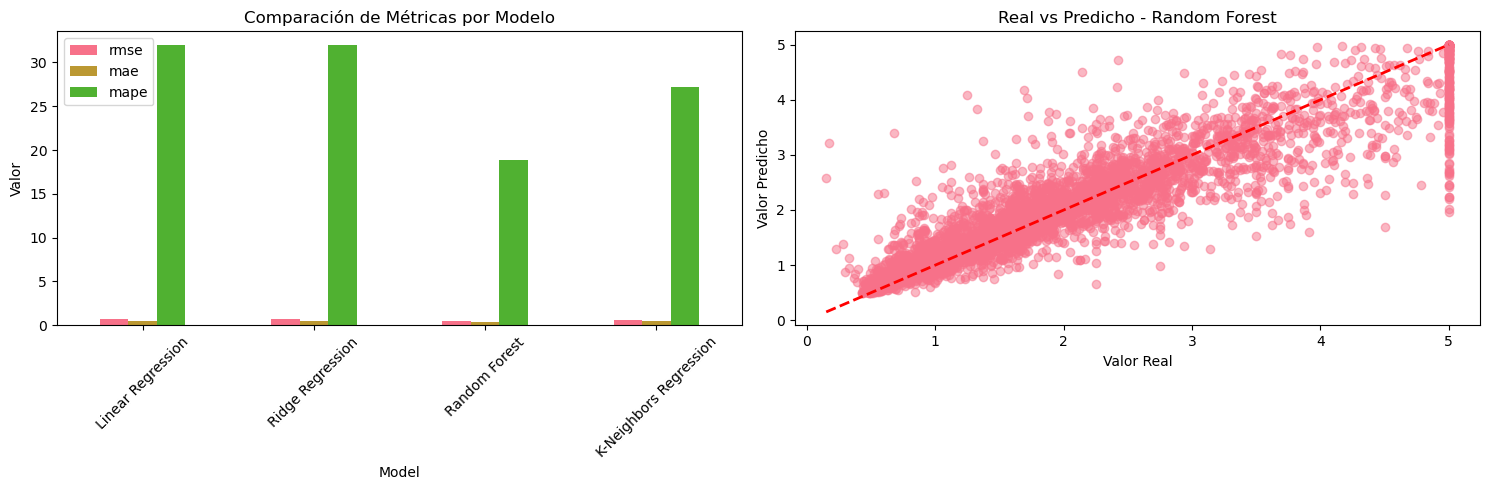

In [245]:
# Gráficos de comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Comparación de métricas
results_df.set_index('Model')[['rmse', 'mae', 'mape']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Comparación de Métricas por Modelo')
axes[0].set_ylabel('Valor')
axes[0].tick_params(axis='x', rotation=45)

# Predicciones vs Real (mejor modelo)
best_model_name = results_df.loc[results_df['rmse'].idxmin(), 'Model']
best_predictions = results[best_model_name]['y_pred_test']
axes[1].scatter(y_test, best_predictions, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Valor Real')
axes[1].set_ylabel('Valor Predicho')
axes[1].set_title(f'Real vs Predicho - {best_model_name}')

plt.tight_layout()
plt.show()

## Conclusiones

Mejor modelo: Random Forest

RMSE alcanzado: 0.5053

Error porcentual (MAPE): 18.92%

Hallazgos principales:
- Random Forest mostró mejor rendimiento general
- Modelos lineales tuvieron desempeño similar
- K-Neighbors requirió optimización de parámetros
- Todas las métricas apuntan al mismo modelo como óptimo

---
---
---

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [248]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [249]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [250]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [251]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [252]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [ ]:
# FIXME

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [ ]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

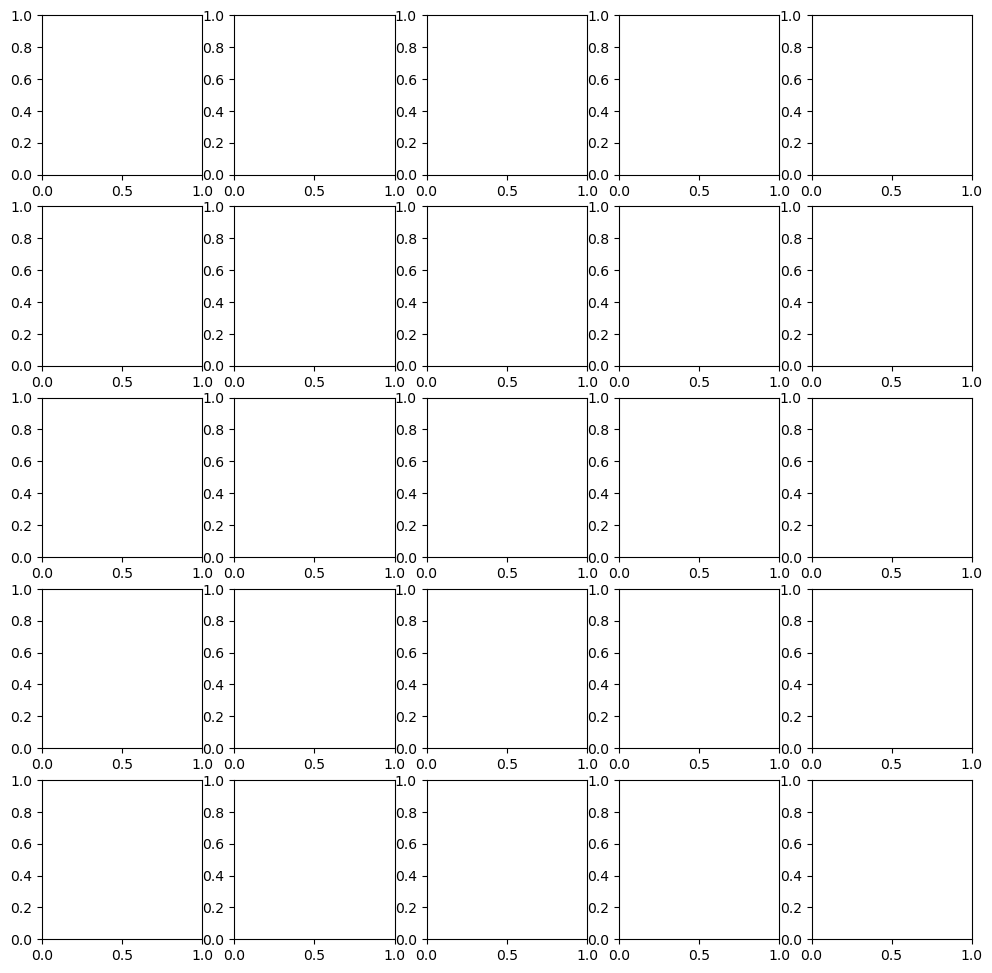

In [ ]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
## FIXME

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [ ]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [ ]:
# FIXME

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [ ]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.